In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

# 10.1.3 Example: The univariate Gaussian

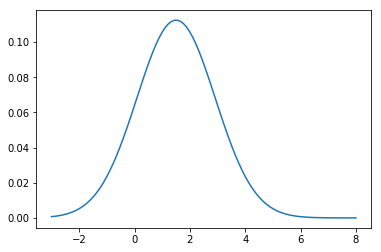

In [9]:
N = 100
mean = 1.5
sigma = 2
x = np.random.normal(mean, sigma, N).reshape(-1,1)
t = np.linspace(-3,8,N).reshape(-1,1)
p = 1/(2*np.pi*np.sqrt(sigma))*np.exp(-.5*(t-mean)**2/sigma)
plt.figure()
plt.plot(t, p)

# variational inference
mu0 = a0 = b0 = lambd0 = 0
mu = (lambd0*mu0 + N*x.mean())/(lambd0 + N)
a = a0 + N/2
lambd = 1
max_iter = 100
for i in range(max_iter):
    b = b0 + .5*((lambd0+N)*(1/lambd + mu**2) - 2*(lambd0*mu0 + x.sum())*mu +np.sum(x**2) + lambd0*mu0**2)
    lambd = (lambd0 + N) * a / b

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in multiply
  


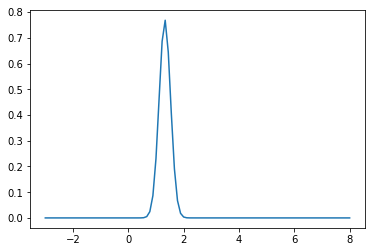

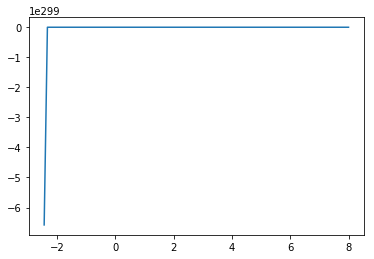

In [10]:
def gam(lambd, a, b):
    p = 1/gamma(a)*b**a*lambd**(a-1)*np.exp(-b*lambd)
    return p

plt.figure()
plt.plot(t, 1/(2*np.pi*np.sqrt(1/lambd))*np.exp(-.5*(t-mu)**2*lambd))
plt.figure()
plt.plot(t, gam(t, a, b))